# Proyek Machine Learning 1: [Diabetes Dataset]
- **Nama:** [Andreas Kevin]
- **Email:** [Kevinandreas913@gmail.com]
- **ID Dicoding:** [andreas_kevin_6396]

## Menentukan Problem Statement

- Dari fitur yang ada, fitur apa yang memberikan pengaruh signifikan atas penentuan seseorang terkena diabetes?
- Bagaimana mengetahui seseorang mengidap diabetes atau tidak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.model_selection import GridSearchCV, train_test_split

import sklearn.neural_network as ann
import sklearn.metrics as met 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

## Data Understanding

### Data gathering

- Dataset diperoleh dari: https://www.kaggle.com/datasets/mathchi/diabetes-data-set 
- Dataset didownload dalam format .csv file 

In [2]:
df_diabetes = pd.read_csv("Diabetes.csv", sep=",")
display(df_diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Insight:**
- Proses pengumpulan data berdasarkan data "Data diabetes".
- Dalam menjawab pertanyaan bisnis yang disampaikan, pengumpulan data akan berfokus pada data "diabetes.csv".
- Data dalam bentuk csv sehingga pemanggilan data dan visualisasi tabel diperlukan library pandas.

**Rincian atribut dataset:**
- Pregnancies = Jumlah kehamilan yang pernah dialami pasien.
- Glucose = Konsentrasi glukosa plasma setelah 2 jam dalam tes toleransi glukosa oral.
- BloodPressure = Tekanan darah diastolik dalam satuan mmHg.
- SkinThickness =Ketebalan lipatan kulit triseps dalam mm.
- Insulin = Kadar insulin serum setelah 2 jam (mu U/ml).
- BMI (Body Mass Index) = Indeks massa tubuh yang dihitung sebagai berat (kg) / tinggi (m²).
- DiabetesPedigreeFunction = Skor yang menunjukkan kemungkinan seseorang terkena diabetes berdasarkan riwayat keluarga.
- Age = Usia pasien dalam tahun.
- Outcome, Target kelas (0 = tidak diabetes, 1 = diabetes) = Model akan mencoba memprediksi apakah seseorang menderita diabetes atau tidak berdasarkan fitur lainnya.



### EDA (Exploratory Data Analysis)

In [3]:
df_diabetes.info()

print("jumlah data kosong: ", df_diabetes.isnull().sum())
print("Jumlah duplikasi: ", df_diabetes.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
jumlah data kosong:  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age      

**Insight:**
- Proses df_diabetes.info() pada data tersebut menampilkan jenis kolom, tipe data dan isi dari kolom tersebut.
- Tidak ada masalah dengan jumlah data yang dimunculkan (semua data terisi dan tidak ada kosong).
- Tidak ada duplipkasi data dari dataframe tersebut.

In [4]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insight:**
- Kode df_diabetes.describe() bertujuan untuk menunjukkan parameter statistik.
- data parameter statistik yang dihsilkan terlihat ada beberapa keanehan outlier pada data.

In [5]:
def outlier(nama):
    q25, q75 = np.percentile(df_diabetes[nama], 25), np.percentile(df_diabetes[nama], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
     
    outlier = [x for x in df_diabetes[nama] if x < minimum or x > maximum]
    return outlier

for atribut in df_diabetes.columns:
    print(f"Adapun outlier pada atribut {atribut} : {outlier(atribut)}")

Adapun outlier pada atribut Pregnancies : [15, 17, 14, 14]
Adapun outlier pada atribut Glucose : [0, 0, 0, 0, 0]
Adapun outlier pada atribut BloodPressure : [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]
Adapun outlier pada atribut SkinThickness : [99]
Adapun outlier pada atribut Insulin : [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]
Adapun outlier pada atribut BMI : [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
Adapun outlier pada atribut DiabetesPedigreeFunction : [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]
Adapun outlier pada atribut Age : [69, 67

**Insight:**
- Kode diatas merupakan proses pemeriksaan outlier menggunakan teknik IQR berdasarkan 25% dan 75%.
- Terlihat ada masalah outlier pada data, ini akan berakibat moel machine learning tidak berjalan dengan baik.

### Visualization EDA (Exploratory Data Analysis)

Boxplot untuk Pregnancies:


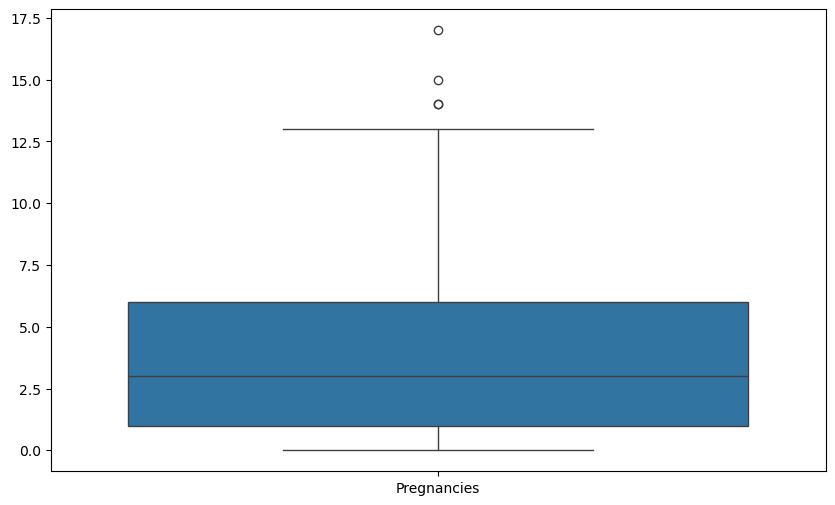

Boxplot untuk Glucose:


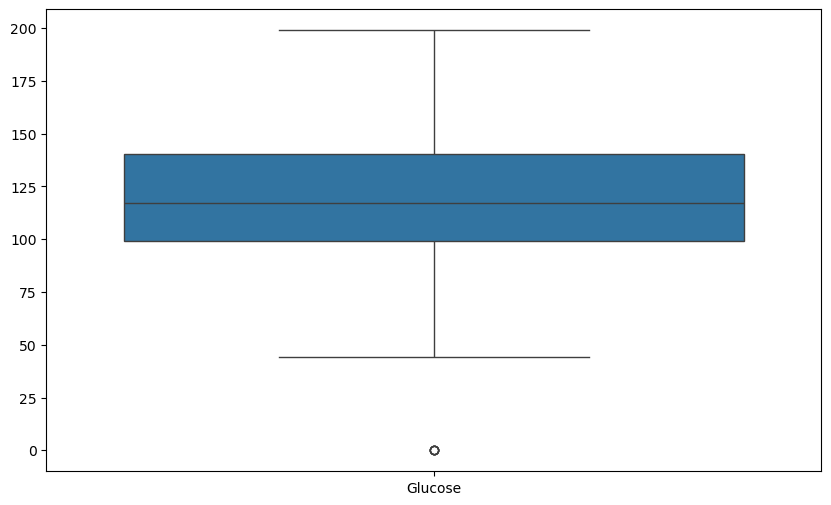

Boxplot untuk BloodPressure:


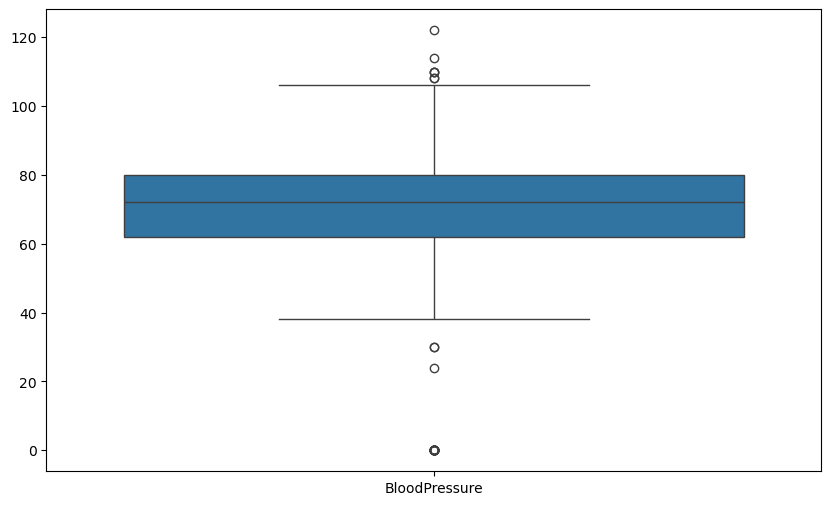

Boxplot untuk SkinThickness:


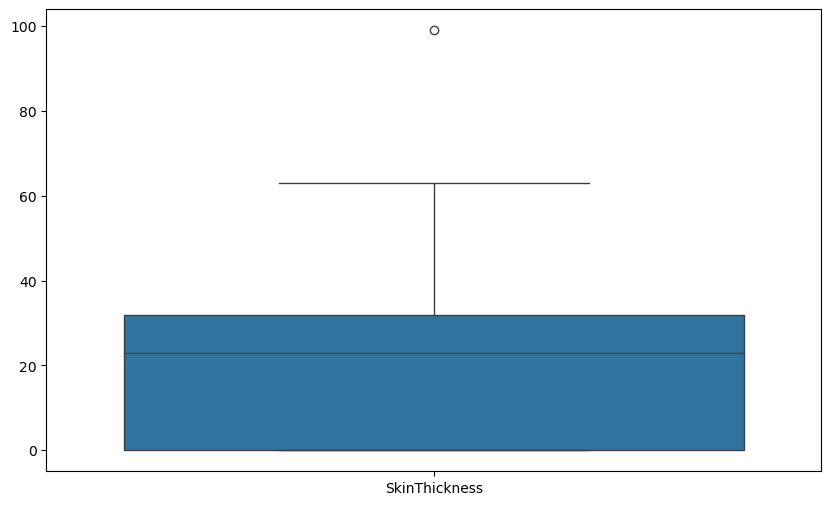

Boxplot untuk Insulin:


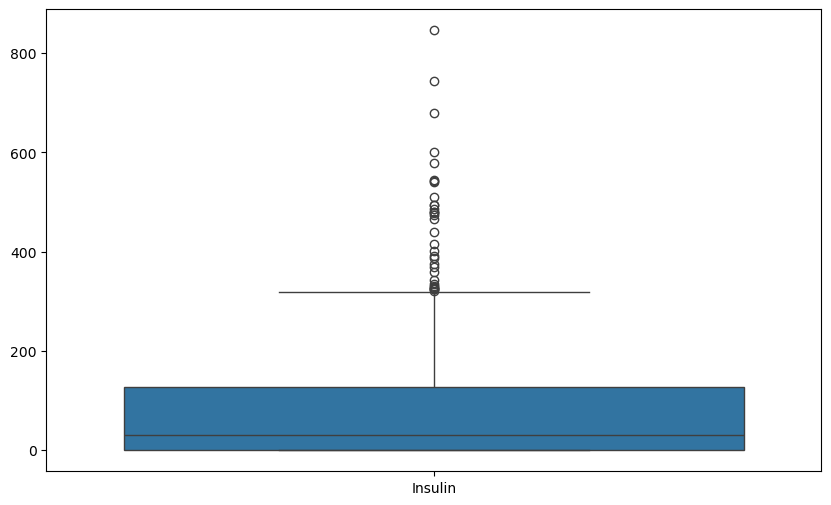

Boxplot untuk BMI:


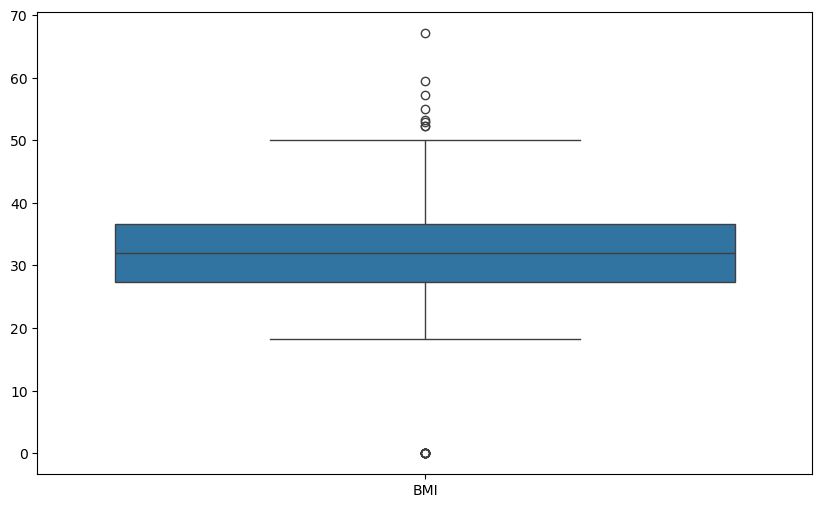

Boxplot untuk DiabetesPedigreeFunction:


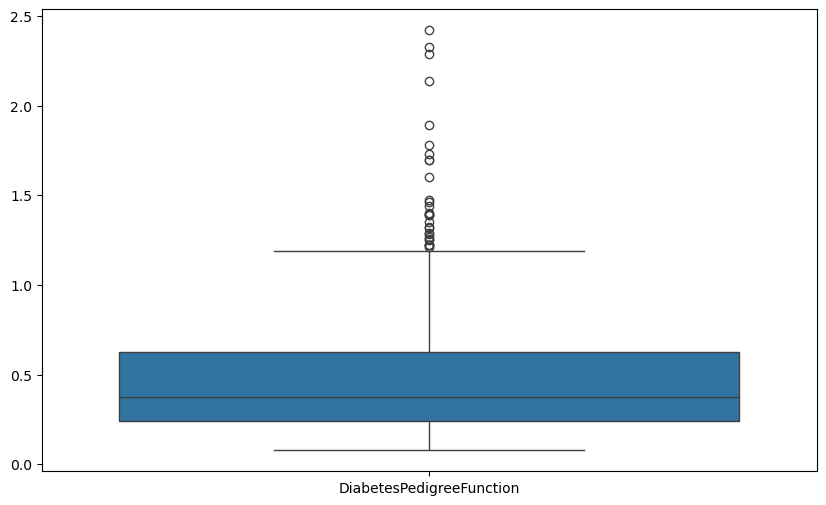

Boxplot untuk Age:


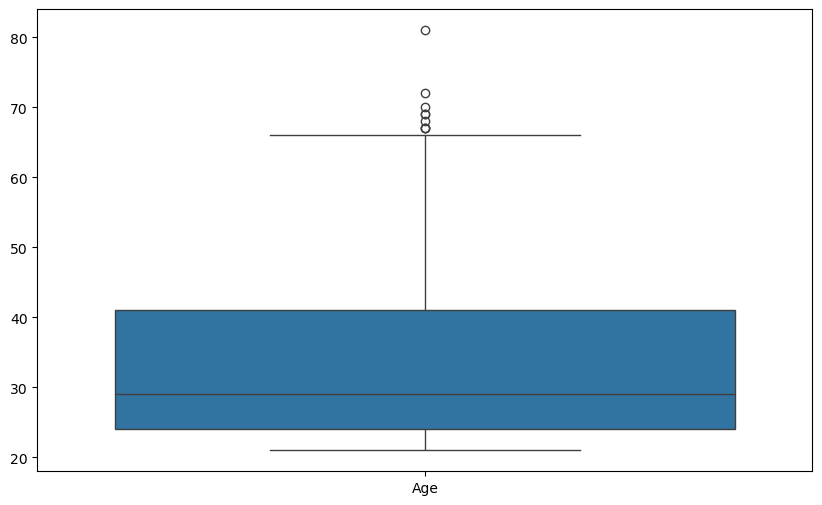

Boxplot untuk Outcome:


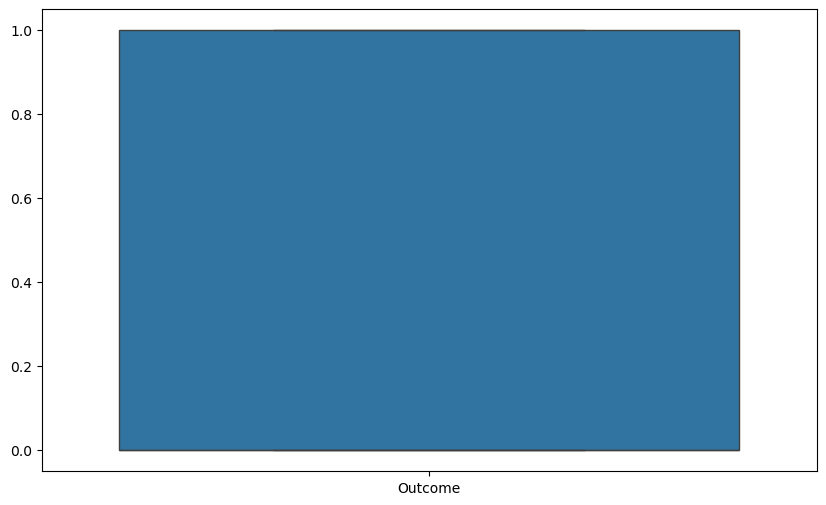

In [6]:
def boxplot(name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_diabetes[[name]])
    plt.show()

for col in df_diabetes.columns:
    print(f"Boxplot untuk {col}:")
    boxplot(col)

**Insight:**
- Proses diatas merupakan visualisasi boxplot yang membntu visualisasi dalam pemeriksaan outlier sebelumnya.

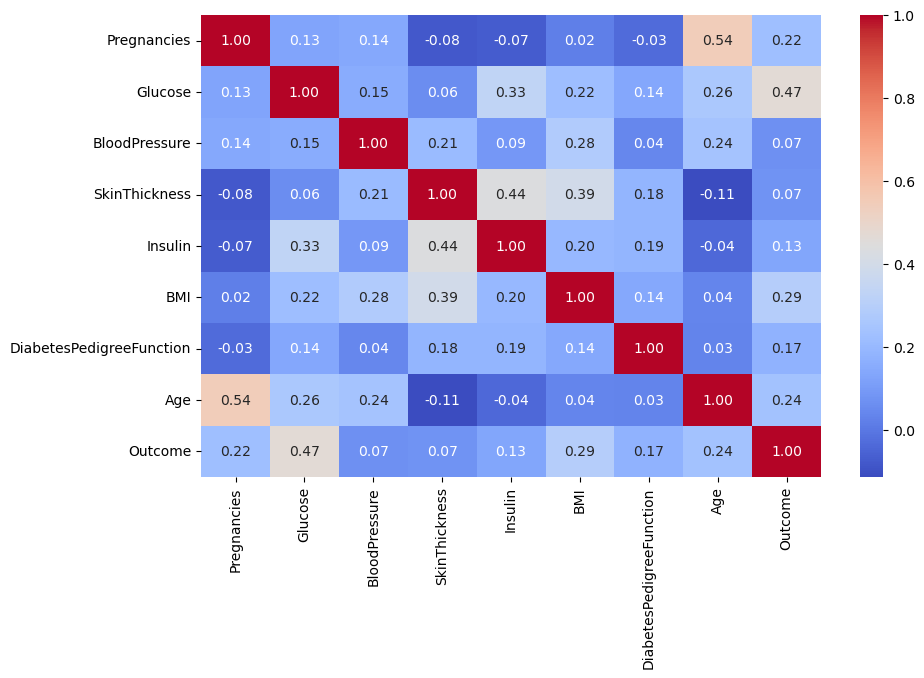

In [7]:
numeric_df = df_diabetes.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Insight:**
- Proses tersebut bertujuan untuk memunculkan kolerasi antar atribut dan melihat atribut yang memiliki kolerasi tersebesar terhadap indikasi seseorang mengalami diabetes atau tidak.

Histogram untuk Pregnancies:


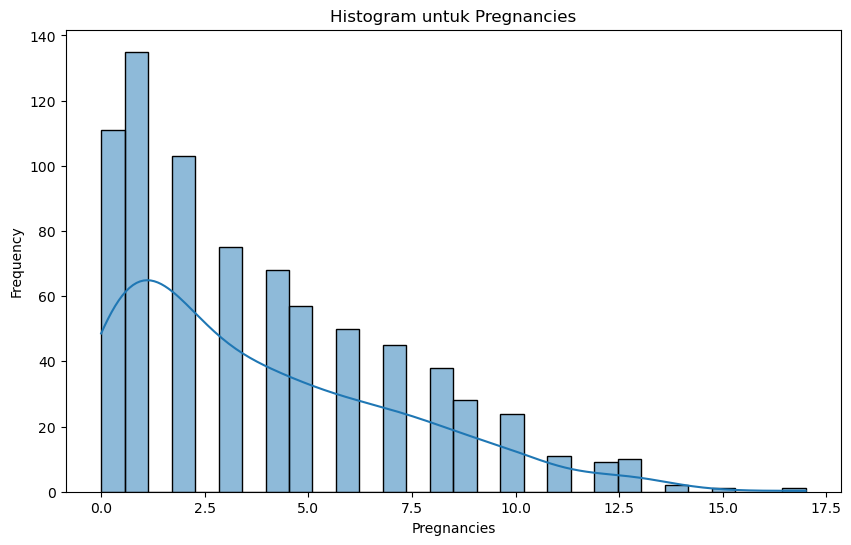

Histogram untuk Glucose:


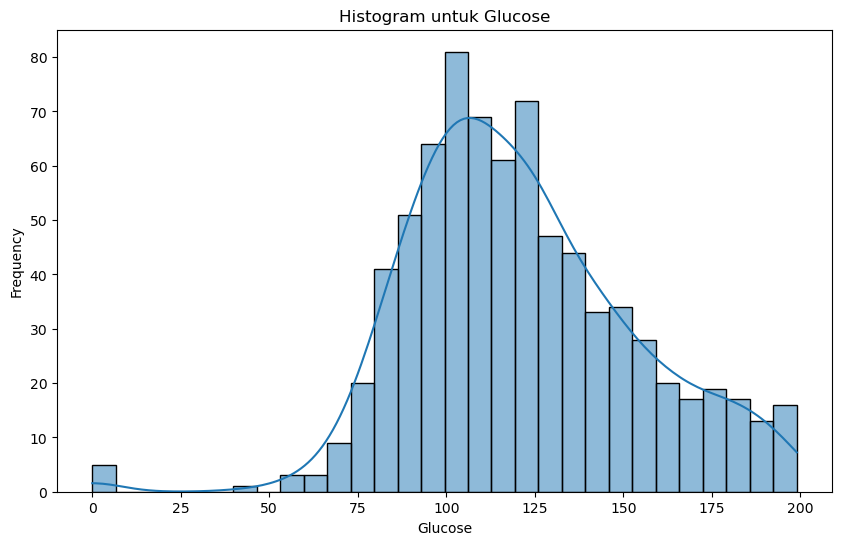

Histogram untuk BloodPressure:


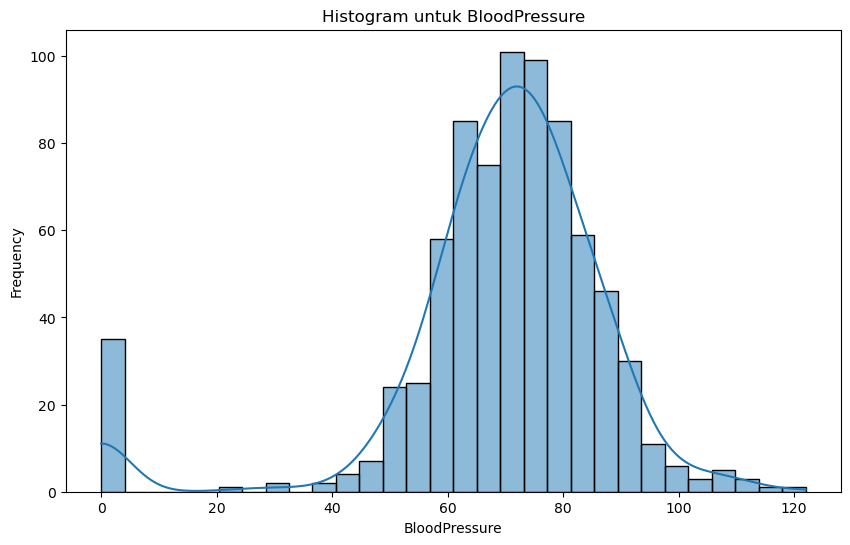

Histogram untuk SkinThickness:


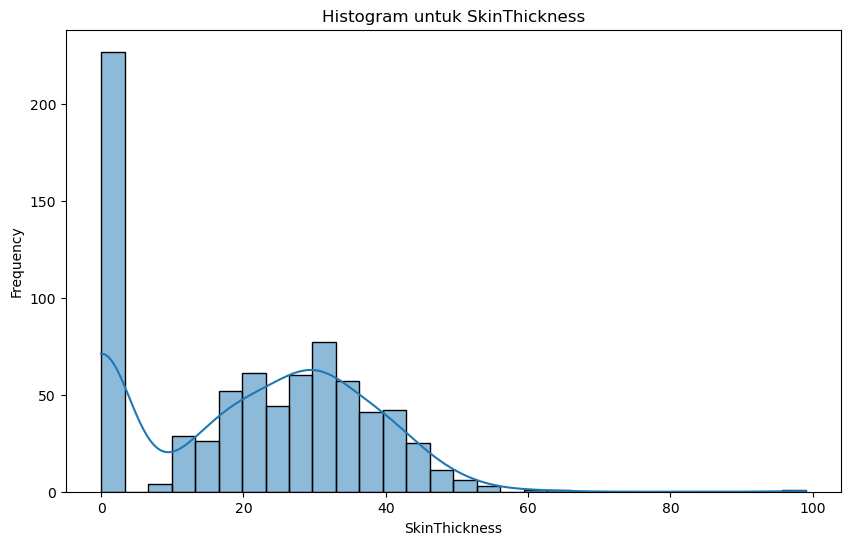

Histogram untuk Insulin:


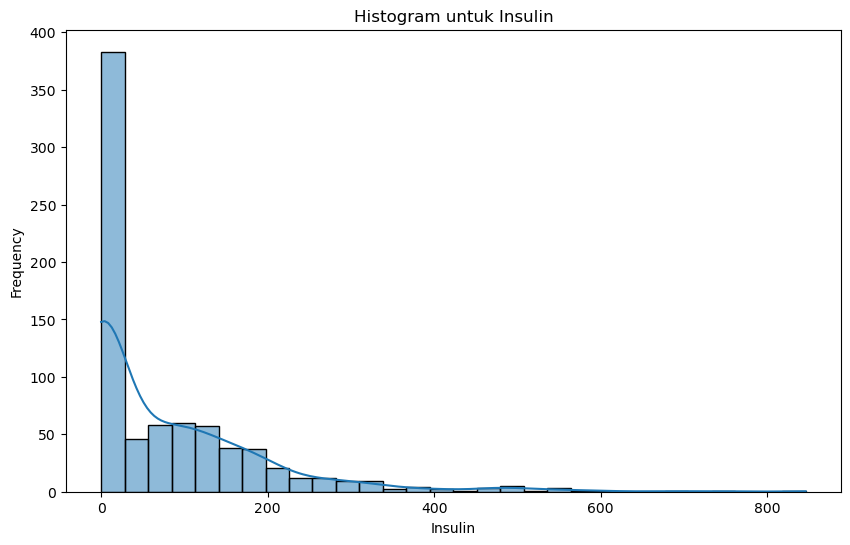

Histogram untuk BMI:


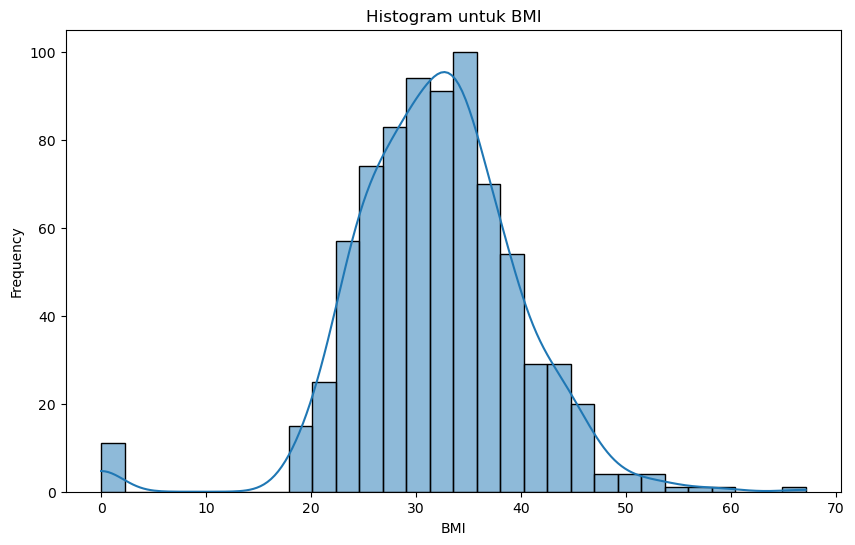

Histogram untuk DiabetesPedigreeFunction:


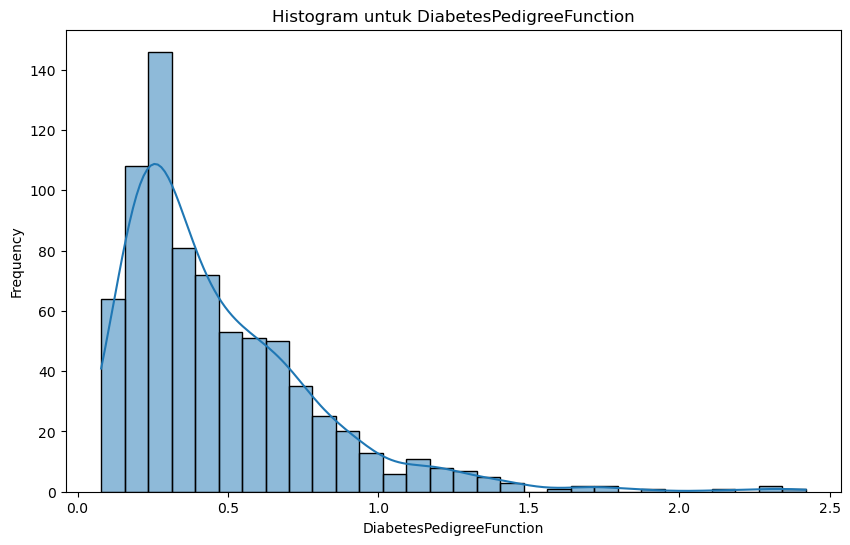

Histogram untuk Age:


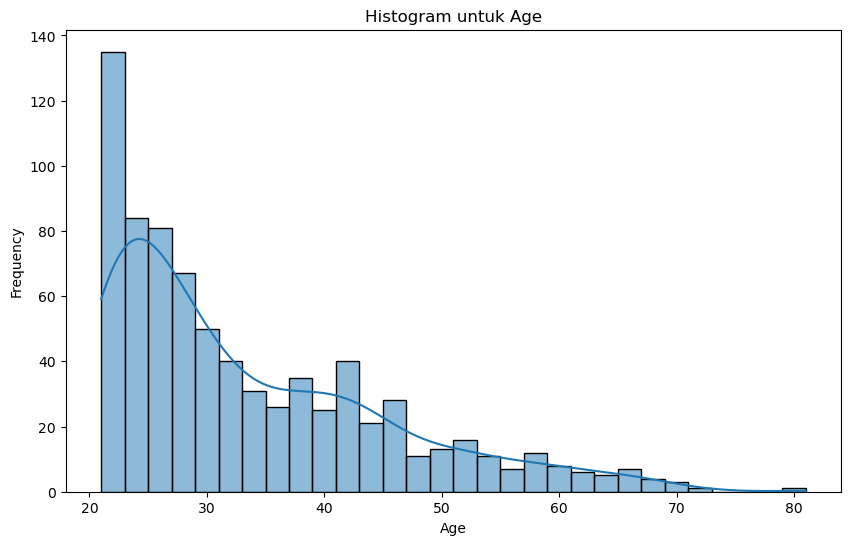

Histogram untuk Outcome:


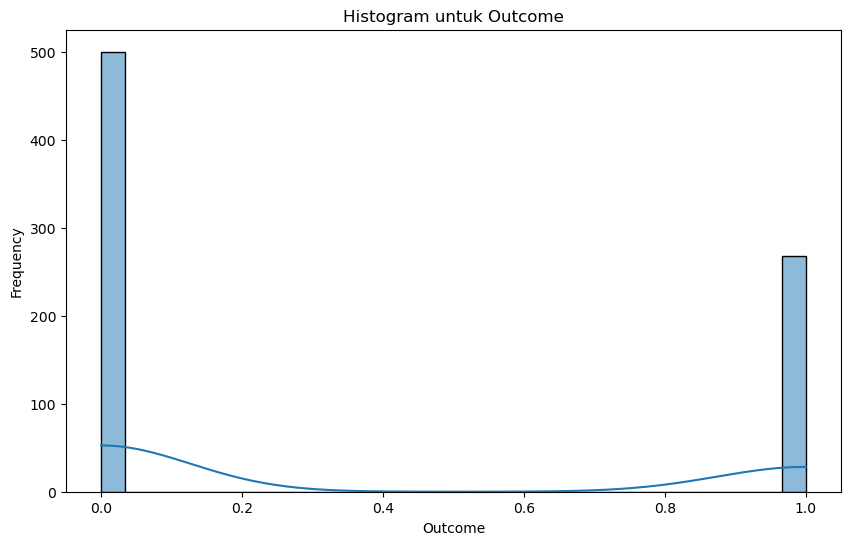

In [8]:
def histogram(name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_diabetes[name], bins=30, kde=True)
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram untuk {name}")
    plt.show()

for col in df_diabetes.select_dtypes(include=[np.number]).columns:
    print(f"Histogram untuk {col}:")
    histogram(col)

**Insight:**
- Visualisasi histogram bertujuan untuk melihat pernyebaran data saat ini.

## Data Prepration

In [9]:
# Data outlier yang harus diperbaiki -> lakukan teknik mengatasi outlier dengan teknik menghapus oulier.
def kolomoutlier(df):
    outlier_columns = []
    for col in df.select_dtypes(include=[np.number]).columns:
        q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        outliers = df[(df[col] < minimum) | (df[col] > maximum)]
        if not outliers.empty:  # Jika ada outlier, tambahkan ke list
            outlier_columns.append(col)
    
    return outlier_columns

# perintah hapus outlier
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        q25, q75 = np.percentile(df_clean[col], 25), np.percentile(df_clean[col], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        df_clean = df_clean[(df_clean[col] >= minimum) & (df_clean[col] <= maximum)]
    
    return df_clean

columns_with_outliers = kolomoutlier(df_diabetes)
print(f"Kolom dengan outlier: {columns_with_outliers}")

df_diary_clean = remove_outliers(df_diabetes, columns_with_outliers)
print(f"Jumlah data sebelum menghapus outlier: {len(df_diabetes)}")
print(f"Jumlah data setelah menghapus outlier: {len(df_diary_clean)}")

df_diabetes = df_diary_clean
display(df_diabetes)

Kolom dengan outlier: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Jumlah data sebelum menghapus outlier: 768
Jumlah data setelah menghapus outlier: 636


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Insight:**
- Proses tersebut dilakukan untuk menghpus data outlier pada data, agar pembelajaran model machine learning dapat berjalan dengan baik. 

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_diabetes_scaled = scaler.fit_transform(df_diabetes)

df_diabetes = pd.DataFrame(df_diabetes_scaled, columns=df_diabetes.columns)

df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.490446,0.506458,0.659091,1.0
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.267516,0.251845,0.227273,0.0
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.162420,0.547970,0.250000,1.0
3,0.076923,0.292208,0.411765,0.383333,0.284848,0.315287,0.082103,0.000000,0.0
4,0.384615,0.467532,0.529412,0.000000,0.000000,0.235669,0.113469,0.204545,0.0


**Insight:**
- Proses normalisasi dilakukan dengan teknik normalisasi minmax. Tujuan dilkaukan normalisasi mendorong stabilitas dalam proses pengoptimalan, mendorong konvergensi yang lebih cepat.

In [11]:
X = df_diabetes.drop(['Outcome'], axis=1)
y = df_diabetes['Outcome']

**Insight:**
- Proses tersebut membagi menjadi atribut untuk pembelajaran yang disimpan dalam X dan atribut tujuan yang disimpan dalam y.

##### Pembagian untuk model machine learning (Logistic Regresion dan Multi Layer Perceptron)

In [12]:
X_train_MLP, X_test_MLP, y_train_MLP, y_test_MLP = train_test_split(X, y, test_size=0.2)

In [13]:
X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split(X, y, test_size=0.2)

## Model Development

### logistic Regresion

In [14]:
LG = LogisticRegression(random_state=0, max_iter=10000)
LG.fit(X_train_LG, y_train_LG)

LogisticRegression(max_iter=10000, random_state=0)

**Insight:**
- Proses tersebut merupakan proses mempersiapkan model Logistic Reggresion. dengan random state adlah 0 dan maksimal iterasi adalah 2000.
- Model untuk saat ini dilakukan pelatihan terhadap data train menggunakan perintah fit.

In [15]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'lbfgs']  
}

**Insight:**
- Kemungkinan parameter yang dibuat masih belum sesuai dengan kasus ini sehingga akan dilkaukan pencarian parameter terbaik menggunakan teknik gridsearch.
- Pada codingan tersebut penggunaan gridsearch dilakukan untuk mencari C dan penalty.

**Parameter c mengontrol regularisasi, yaitu seberapa besar model mencoba menghindari overfitting.**  
**Parameter penalty menentukan jenis regularisasi yang digunakan untuk mencegah overfitting:**  
**- penalty='l1' (Lasso Regularization)**
Memaksa beberapa koefisien menjadi nol, sehingga dapat digunakan untuk feature selection.  
Hanya didukung oleh solver liblinear.  

**- penalty='l2' (Ridge Regularization)**  
Mengecilkan semua koefisien tetapi tidak membuatnya nol.  
Membantu mengurangi overfitting tanpa menghilangkan fitur sepenuhnya.  
Didukung oleh lbfgs dan liblinear.  

In [16]:
grid_search = GridSearchCV(LG, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_LG, y_train_LG)
print(f"Best Parameter: {grid_search.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameter: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _che

**Insight:**
- Proses melakukan pencarian parameter terbaik dengan mencoba setiap parameter ke dalam x train dan y train.
- Error yang dimunculkan tidak masalah, ini hanya dikarenakan tidak menssuport l1 penalty.

In [17]:
LG = grid_search.best_estimator_
y_pred_LG = LG.predict(X_test_LG)

**Insight:**
- dari estimator terbaik yang telah diperoleh kita lakukan untuk coba lakukan prediksi menggunakan X test.
- Hasil prediksi kemudian disimpan dalam y pred.

### MLP (Multi Layer Perceptron)

In [19]:
mlp = MLPClassifier(max_iter=2000, random_state=42, solver='adam')

**Insight:**
- Bangun model mlp dengan parameter awal, maksimal iterasi sebanya 2000, random_state = adam, dan optimizer adalah adam.

In [20]:
# Buat grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100), (50,50,50), (100,100,100)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

**Insight:**
- Proses tersebut membangun grid search untuk mencari parameter terbaik pada MLP.
- Parameter yang dilkukan pencarian yaitu hiden_layer_sizes, activation, alpha, dan learning_rate.

**Parameter hidden layer size adalah jumlah hidden layer yang akan dibangun misalnya (50,50,50) -> 3 hidden layer dengan 50 neuron**  
**Activation unuk fungsi akivasi, yang digunakan berupa relu (merupakan fungsi yang umum digunakan biasanya di deep learning) dan logistic (digunakan untuk hasil ouput pada kasus dengan output biner yaitu 0 dan 1)**  
**Alpha digunakan untuk mengontrol regulasi terutama dalam menghindari overfitting**  
**Parameter Learning_rate berfungsi dalam mengatur kecepatan belajar, yang digunakan berupa constant (nilai yang tetap sama selama training) dan adaptive (menyesuaikan nilai learning rate selama training berdsarkan loss yang diperoleh)**

In [21]:
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_MLP, y_train_MLP)
print(f"Best Parameter: {grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameter: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}


**Insight:**
- Proses melakukan pencarian parameter terbaik dengan mencoba setiap parameter yang telah dirancang ke dalam x train dan y train.

In [22]:
# Best model evaluation
best_model = grid_search.best_estimator_
y_pred_MLP = best_model.predict(X_test_MLP)

**Insight:**
- dari estimator terbaik yang telah diperoleh kita lakukan untuk coba lakukan prediksi menggunakan X test.
- Hasil prediksi kemudian disimpan dalam y pred.

## Evaluation

Akurasi: 0.8359375
F1-Score: 0.831985903814262
Precision: 0.8310920352510809
Recall: 0.8359375


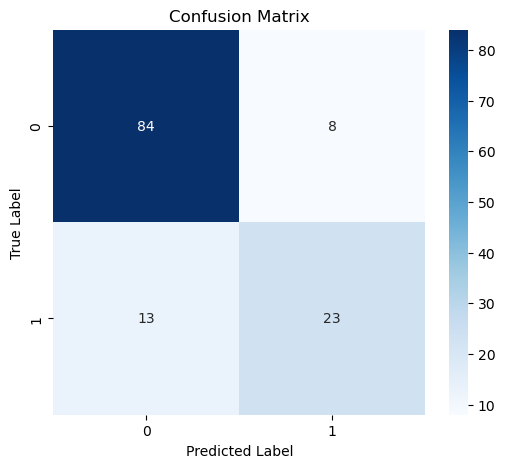

In [18]:
akurasi_LG = met.accuracy_score(y_test_LG, y_pred_LG)
f1score_LG = met.f1_score(y_test_LG, y_pred_LG, average='weighted')
precision_LG = met.precision_score(y_test_LG, y_pred_LG, average='weighted')
recall_LG = met.recall_score(y_test_LG, y_pred_LG, average='weighted')

print("Akurasi:", akurasi_LG)
print("F1-Score:", f1score_LG)
print("Precision:", precision_LG)
print("Recall:", recall_LG)

cm_LG = met.confusion_matrix(y_test_LG, y_pred_LG)

# Buat visualisasi dengan heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_LG, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Evaluation Logistic Regresion Model

**Insight:**
- Proses tersebut merupakan proses confusion matriks untuk menilai kinerja Logistic Reggresion.
- Penggunaan library sklearn untuk menilai accuracy, f1-score, precision, dan recall.
- Hasil juga divisualisasi menggunakan heamap berdasarkan hasil data test dan prediksi.
- Hasil akurasi untuk model ini mencapai >80% yang dimana hasil ini bagus dan dapat diterapkan sebagai model.

In [23]:
print("MSE =", mean_squared_error(y_test_LG, y_pred_LG))
print("MAE =", mean_absolute_error (y_test_LG, y_pred_LG))

MSE = 0.1640625
MAE = 0.1640625


**Insigh:**
- Mengukur model denggunakan library sklearn dengan menggunakan MSE dan MAE.
- Pengukuran ini dilakukan untuk menilai seberapa jauh hasil prediksi dengan hasil asli.
- Hasil MAE dan MSE sama dikarenakan data yang digunakan adalah data biner (0,1) sehingga pastinya hasil ini akan sama. Maka karena itu pengukuran kasus ini cukup menggunakan MAE saja.
- Pada kasus ini ditampilkan hasil MSE dan MAE sebagai pembuktian atas poin nomor 3 yang disampaikan bahwa data outpu biner akan menghasilkan nilai evaluasi yang sama.

### Evaluation MLP Model

Akurasi: 0.78125
F1-Score: 0.7795869883040936
Precision: 0.7783356845856846
Recall: 0.78125


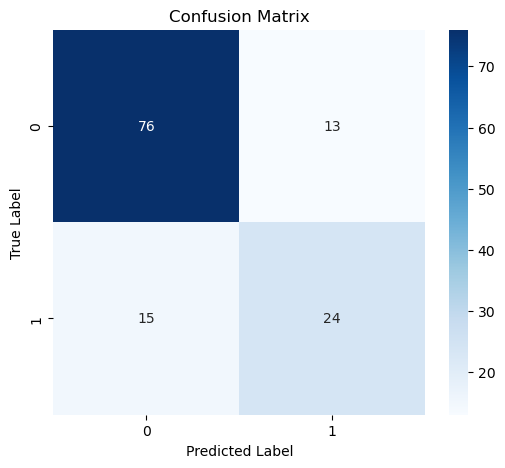

In [24]:
akurasi_MLP = met.accuracy_score(y_test_MLP, y_pred_MLP)
f1score_MLP = met.f1_score(y_test_MLP, y_pred_MLP, average='weighted')
precision_MLP = met.precision_score(y_test_MLP, y_pred_MLP, average='weighted')
recall_MLP = met.recall_score(y_test_MLP, y_pred_MLP, average='weighted')

print("Akurasi:", akurasi_MLP)
print("F1-Score:", f1score_MLP)
print("Precision:", precision_MLP)
print("Recall:", recall_MLP)

cm_MLP = met.confusion_matrix(y_test_MLP, y_pred_MLP)

# Buat visualisasi dengan heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_MLP, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Insight:**
- Proses tersebut merupakan proses confusion matriks untuk menilai kinerja MLP.
- Penggunaan library sklearn untuk menilai accuracy, f1-score, precision, dan recall.
- Hasil juga divisualisasi menggunakan heamap berdasarkan hasil data test dan prediksi.
- Hasil akurasi untuk model ini mencapai 78% yang dimana hasil ini dalam dunia bisnis dikelompokkan sebagai model machine learning yang dapat digunakan.

In [25]:
print("MSE =", mean_squared_error(y_test_MLP, y_pred_MLP))
print("MAE =", mean_absolute_error (y_test_MLP, y_pred_MLP))

MSE = 0.21875
MAE = 0.21875


**Insigh:**
- Mengukur model denggunakan library sklearn dengan menggunakan MSE dan MAE.
- Pengukuran ini dilakukan untuk menilai seberapa jauh hasil prediksi dengan hasil asli.
- Hasil MAE dan MSE sama dikarenakan data yang digunakan adalah data biner (0,1) sehingga pastinya hasil ini akan sama. Maka karena itu pengukuran kasus ini cukup menggunakan MAE saja.
- Pada kasus ini ditampilkan hasil MSE dan MAE sebagai pembuktian atas poin nomor 3 yang disampaikan bahwa data outpu biner akan menghasilkan nilai evaluasi yang sama.